# Predicting house prices on Bengaluru_House_Dataset

# Day 1: Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

## Data Preprocessing

In [4]:
data.groupby('area_type').count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [5]:
# dropping certain columns from thr data frame that are less relevant for predicting price
working_df = data.drop(['area_type','availability','society','balcony'], axis = 'columns')
working_df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
# looking for NaN values
working_df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# dropping all NaN values
working_df1 = working_df.dropna()
working_df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
# having a look at size column
working_df1['size']
# we can see the values are not consistent at some places we have 2BHK and at some places we have 4 Bedroom

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [9]:
# so we check for all unique values
working_df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# so we create a new column as BHK containing numeric values
working_df1["BHK"] = working_df1["size"].apply(lambda x: int(x.split(" ")[0]))
working_df1.head()

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
working_df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
# looking at homes with more than 20 bedrooms
working_df1[working_df1['BHK']>20]
# this seems like an error as 2400 sq ft cannot have 43 bedrooms

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
# now lets explore the total_sqft column
working_df1.total_sqft.unique()

# total_sqft column is not uniform
# what we see here is that we are getting a range of values also instead of a single value like '1133 - 1384'

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# we will try to convert the values into float
# whatever values fail to convert to float, they are the invalid values

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# ~working_df1.total_sqft.apply(is_float) # we get a list of true and false
working_df1[~working_df1.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
# we will take the average of the range values
# for now we will ignore the values like 34.46Sq. Meter, 4125Perch
def convert_to_avg(x):
    l = x.split("-")
    if len(l) == 2:
        avg = (float(l[0])+float(l[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None
    
working_df2 = working_df1.copy()
working_df2.total_sqft = working_df2.total_sqft.apply(convert_to_avg)
working_df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
# at row 122 we had a range 3067 - 8156
working_df2.total_sqft[122]
# now we have the average value

5611.5

## So far we have:
## 1.) Handled missing values in our data
## 2.) Removed unecessary features
## 3.) Cleaned our total_sqft column

## Day 2: Feature Engineering

In [18]:
# currently our dataframe looks like this
working_df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
working_df3 = working_df2.copy()

In [20]:
# calculating price per sq ft as it is an important feature for determining price in real estate
# we can calculate this from total price and total_sqft columns
working_df3['price_per_sqft'] = (working_df3['price']*100000)/working_df3['total_sqft']
working_df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
# now lets explore the locations columns
working_df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
working_df3.location.nunique()

1304

In [23]:
# we have large number of unique values
# usually we perform OHE (get_dummies) for converting text data to numeric data
# but using that over here would result in 1304 more columns in our dataframe
# we try dimensionality reduction technique here
# since there are 1304 unique locations, that means there would be many locations with only few data points

# first removing leading and trainling spaces from the location values
working_df3.location = working_df3.location.apply(lambda x: x.strip())

# now getting count of each location
location_stats = working_df3.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

# alternatively we can do value_counts()
# location_stats = working_df.location.value_counts()
# location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [24]:
# we see many locations have very few occurences
# so we can set a threshold lets say all the locations with less than occurences will be treated as 'others'
len(location_stats[location_stats <= 10])

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [26]:
# total number of unique locations
working_df3.location.nunique()

1293

In [27]:
# applying transformation to the locations column
working_df3.location = working_df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [28]:
# now number of unique locations
working_df3.location.nunique()

242

In [29]:
working_df3.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
# now if we convert this location column to numeric by OHE we will only have 242 extra columns

## Day 3: Outlier Detection

In [31]:
# we can use either standard deviation or domain knowledge for outlier detection
# we will look for rows where area of one room is less than a threshold
# we take the threshold as 300 sq ft for one room
# we can find the area of one room by using columns BHK and total_sqft

working_df3[working_df3.total_sqft/working_df3.BHK < 300] 
#these are the rows with area of one room less than 300 sq ft that is very unlikely so we need to remove these rows

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [32]:
working_df3.shape

(13246, 7)

In [33]:
# removing the rows where area of one room is less than 300 sq ft
working_df4 = working_df3[~(working_df3.total_sqft/working_df3.BHK < 300)] 

In [34]:
working_df4.shape

(12502, 7)

In [35]:
# Now looking for other outliers
# Next we check for price_per_sqft column
working_df4.price_per_sqft.describe()

# we need to remove these extreme cases based on std dev
# we assume that our distribution of price_per_sqft is normal
# 68% of data falls between 1 std dev
# so we discard anything beyond 1 std dev

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft <= m+std) & (subdf.price_per_sqft >= m-std)] 
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [38]:
working_df5 = remove_outliers(working_df4)

In [39]:
working_df4.shape

(12502, 7)

In [40]:
working_df5.shape # removed the rows with outliers

(10241, 7)

In [41]:
working_df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [42]:
# next we try to find out whether the price of 3BHK is more than 2BHK for the same sq ft
# we will try to visualize the prices of 2BHK and 3BHK

def plot_scatter_chart(df, location):
    bhk_2 = df[(df.location == location) & (df.BHK == 2)]
    bhk_3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10) 
    plt.scatter(bhk_2.total_sqft, bhk_2.price, label = '2BHK', color = "blue", marker = 'o')
    plt.scatter(bhk_3.total_sqft, bhk_3.price, label = '3BHK', color = "red", marker = '*')
    plt.title(location)
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price")
    plt.legend()

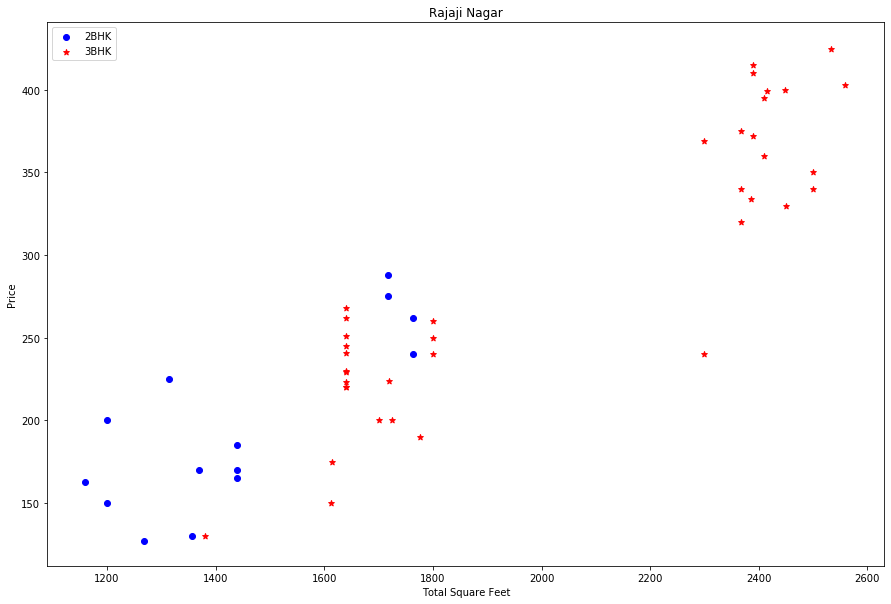

In [43]:
plot_scatter_chart(working_df5, 'Rajaji Nagar')

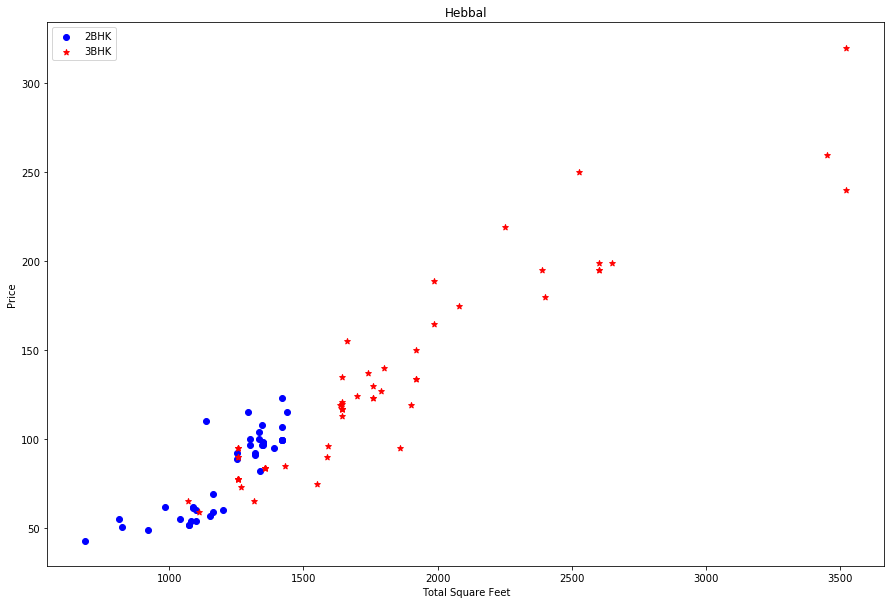

In [44]:
plot_scatter_chart(working_df5, 'Hebbal')

In [45]:
# what we find is that for some properties for the same sq ft the price for 3BHK is less than 2BHK
# so now we will remove all such properties

def remove_bhk_outliers(df):
    exclude_indexes = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indexes = np.append(exclude_indexes,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indexes, axis = 'index')
    

In [46]:
working_df6 = remove_bhk_outliers(working_df5)

In [47]:
working_df6.shape

(7329, 7)

In [48]:
working_df5.shape

(10241, 7)

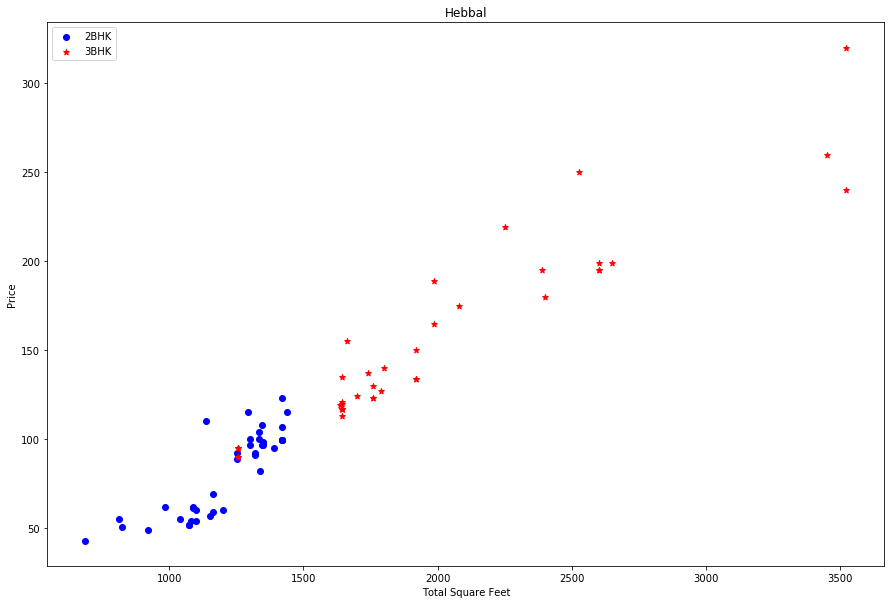

In [49]:
# again we plot scatter chart and check
plot_scatter_chart(working_df6, 'Hebbal')
# we can see in the plot that the 3BHK flats having price less than the 2BHK flats of same area have been removed
# the removal is not exact because perfect removal of such preoperties is very difficult

Text(0, 0.5, 'Count')

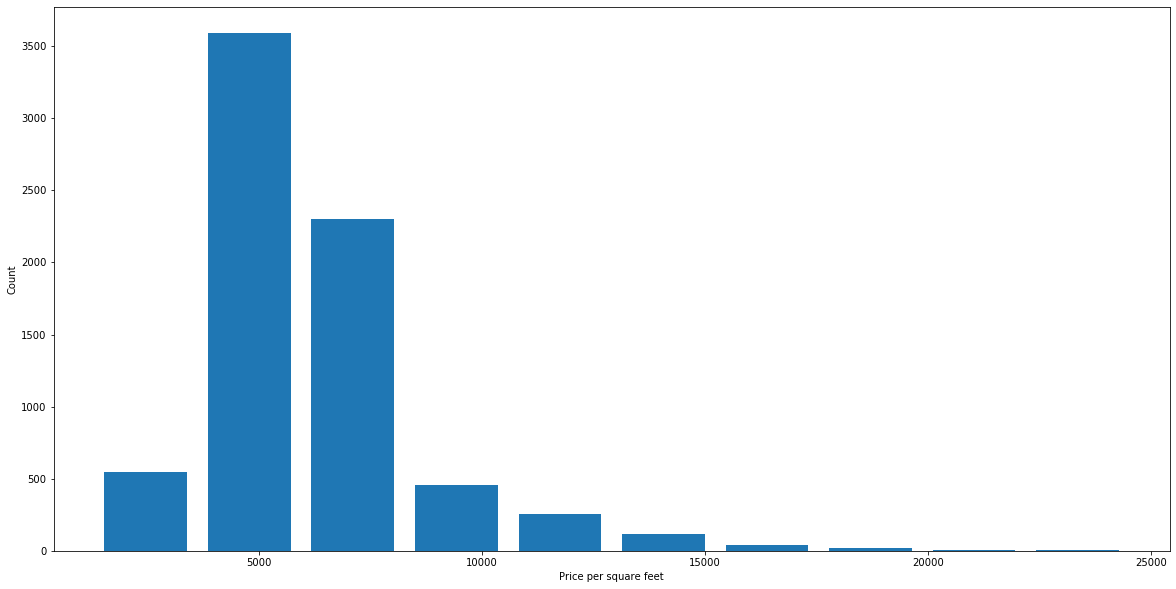

In [50]:
# now we plot a histogram to check how many properties are there in price per sq ft
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(working_df6.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

# we see that most of the properties are from 5000 to 10000 Rs per square feet
# and our data is almost normally distributed

In [52]:
# now lets explore the bathrrom feature
working_df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
# lets see the properties with more than 10 bathrooms
working_df6[working_df6.bath > 10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

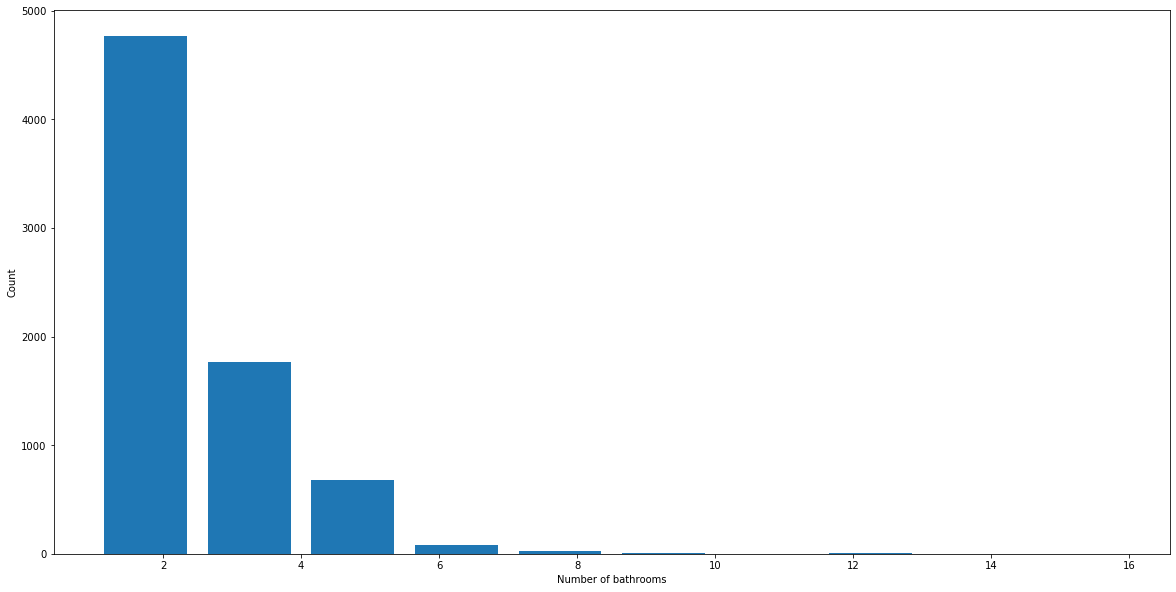

In [54]:
# lets plot a histogram for bathrooms
plt.hist(working_df6.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
# we see most of the properties have 2 bathrooms

In [55]:
# we need to remove those properties where the number of bathrooms exceeds the number of BHK + 2

# checking the properties that have more bathrooms than BHK + 2
working_df6[working_df6.bath > working_df6.BHK + 2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [56]:
# this excludes the properties with bathrooms greater than or equal to tha number of BHK + 2 
working_df7 = working_df6[working_df6.bath < working_df6.BHK + 2]

In [57]:
working_df7.shape # we have successfully removed the outliers with unlikely high number of bathrooms

(7251, 7)

In [58]:
working_df6.shape

(7329, 7)

In [59]:
# now we will finally remove uneccessary features and proceed towards model building
working_df8 = working_df7.drop(['size','price_per_sqft'], axis = 'columns')

In [61]:
working_df8.shape

(7251, 5)

## Day 4: Model Building

In [65]:
# converting location from text numeric using One Hot Encoding
dummies = pd.get_dummies(working_df8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
working_df9 = pd.concat([working_df8, dummies], axis = 'columns')
working_df9 = working_df9.drop(['location','other'], axis = 'columns')

In [71]:
working_df9.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
working_df9.shape

(7251, 245)

In [76]:
# separating the target variable from the features
x = working_df9.drop('price', axis = 'columns')
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y = working_df9.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [81]:
# splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [99]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8452277697874306

In [86]:
# ShuffleSplit adds randomness to the data so the folds have equal distribution of the data samples
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y,cv = cv)

# we are getting a decent cross validation score with linear regression

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [97]:
# now lets try some other regression techniques
# we will now use GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

algos = {'linear regression':{
    'model':LinearRegression(),
    'params':{
        'normalize':[True, False]     
    }
},
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best', 'random']
            }
        }}

In [98]:
scores = []
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
for key, value in algos.items():
    gs = GridSearchCV(value['model'], value['params'], cv = cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model':key,
        'best_score':gs.best_score_,
        'best_parameter':gs.best_params_
    })
    
pd.DataFrame(scores)
# so we can see that linear regrssion with parameter normalize = True is best for our dataset

,model,best_score,best_parameter
0,linear regression,0.818354,{'normalize': True}
1,lasso,0.687447,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.720004,"{'criterion': 'mse', 'splitter': 'best'}"


In [125]:
# now we will make predictions using our model
def predict_price(location, sqft, bath, bhk):
    location_index = np.where(x.columns == location)[0][0] # gives us the column number for our location
    d = np.zeros(len(x.columns))
    d[0] = sqft
    d[1] = bath
    d[2] = bhk
    d[location_index] = 1
    return clf.predict([d])[0]

In [126]:
predict_price('Vijayanagar', 400, 4, 4)

21.260163751682473

In [127]:
predict_price('Vijayanagar', 400, 2, 2)

14.647869391150337

In [128]:
# now we will convert our model to a pickle file
import pickle
with open("Bangalore_house_price_prediction.pickle","wb") as fw:# wb mode opens the file in binary mode
    pickle.dump(clf, fw)

In [131]:
# we also need the columns information
# we will export it as a json file
import json
columns = {
    'data_columns' : [column.lower() for column in x.columns]
}

with open("columns.json", "w") as fw:
    fw.write(json.dumps(columns))